In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
train_data = pd.read_csv('/content/drive/MyDrive/Aimers_온라인 채널 제품 판매량 예측/data/train.csv', parse_dates=True).drop(columns=['제품','ID', '중분류', '소분류', '브랜드'])

In [11]:
train_data

,대분류,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,...,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,2023-04-04
0,B002-C001-0002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B002-C001-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,2,0,0,2,0
2,B002-C001-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,B002-C001-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,B002-C001-0001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15885,B002-C001-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15886,B002-C001-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,2,4,1,1,3
15887,B002-C001-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15888,B002-C001-0003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [12]:
# '대분류' 컬럼을 새로운 컬럼으로 사용하고, 나머지 날짜 컬럼들을 'date' 열로 피벗
df_pivoted = train_data.melt(id_vars=['대분류'], var_name='date', value_name='sales')

# 'date' 열을 datetime 형식으로 변환
df_pivoted['date'] = pd.to_datetime(df_pivoted['date'])

# 'date' 열을 인덱스로 설정
df_pivoted.set_index('date', inplace=True)

# 결과 확인
df_pivoted.head()

,대분류,sales
date,,
2022-01-01,B002-C001-0002,0
2022-01-01,B002-C001-0003,0
2022-01-01,B002-C001-0003,0
2022-01-01,B002-C001-0003,0
2022-01-01,B002-C001-0001,0


In [6]:
df_pivoted['대분류'].unique()

array(['B002-C001-0002', 'B002-C001-0003', 'B002-C001-0001',
       'B002-C001-0005', 'B002-C001-0004'], dtype=object)

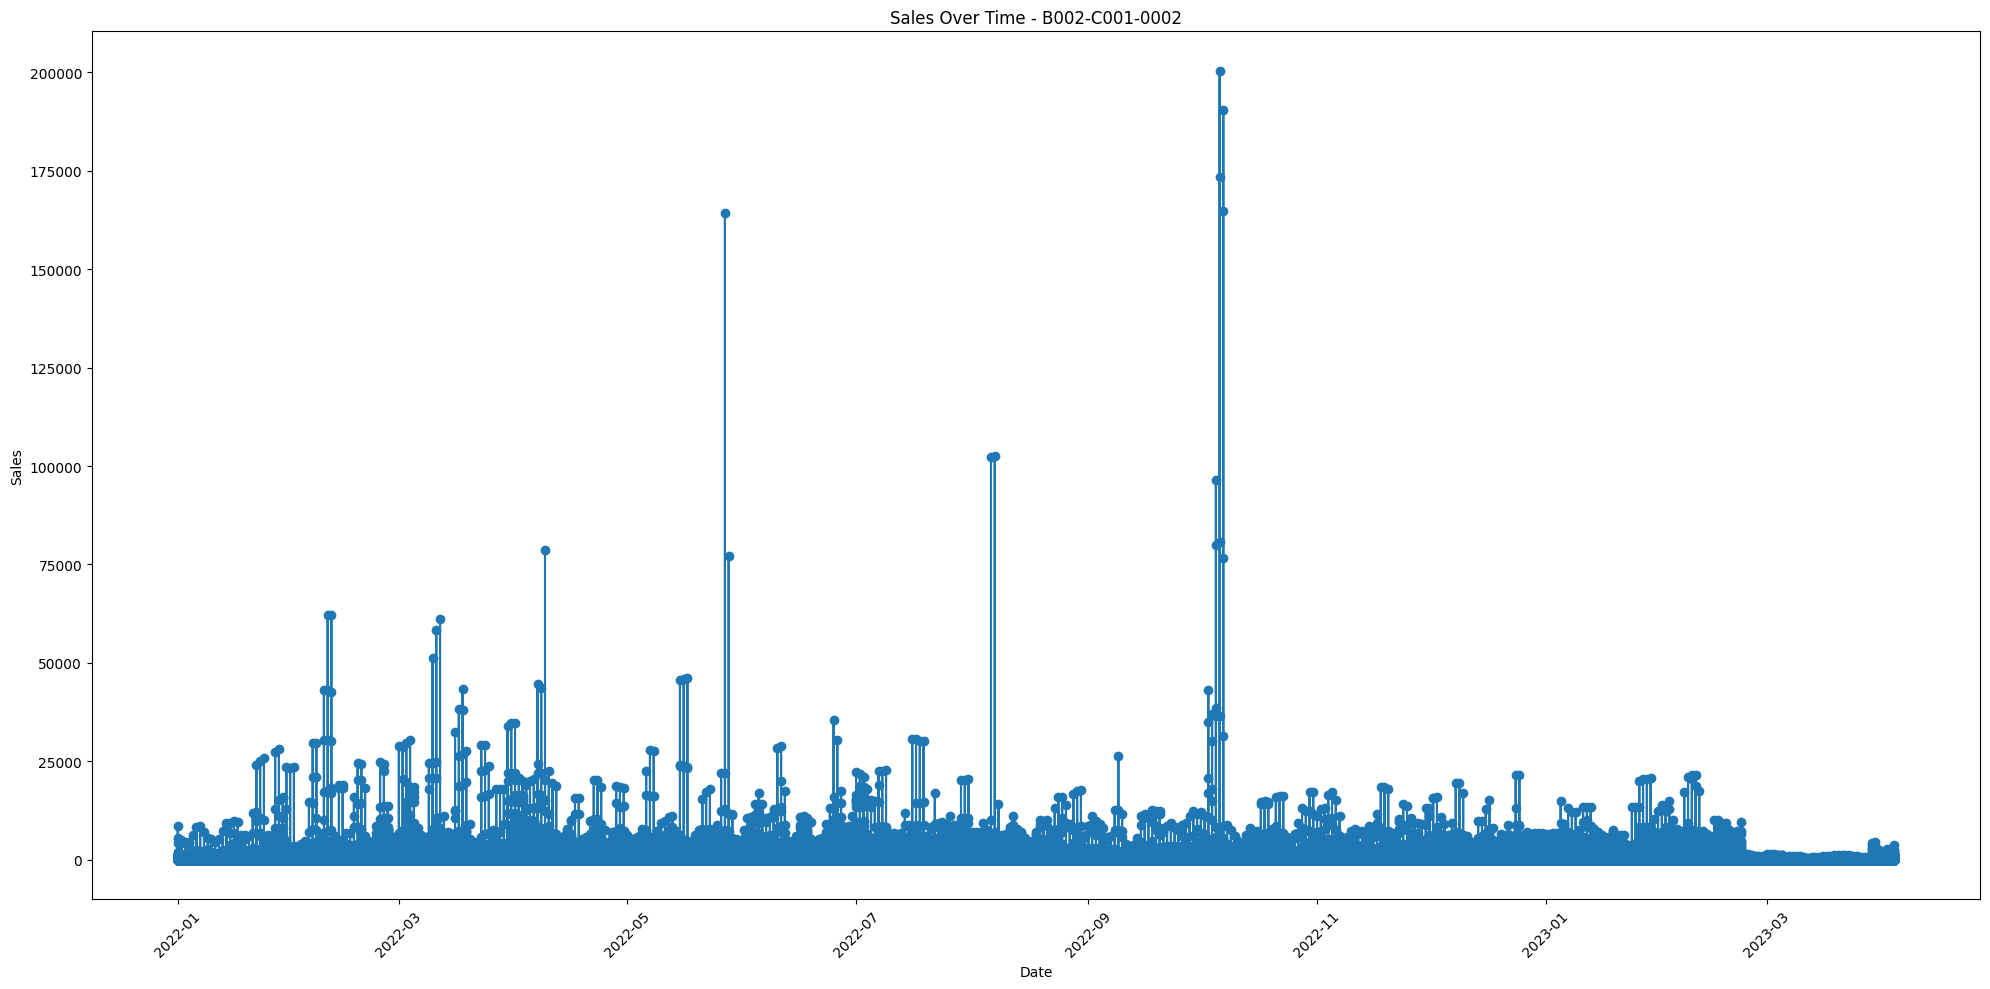

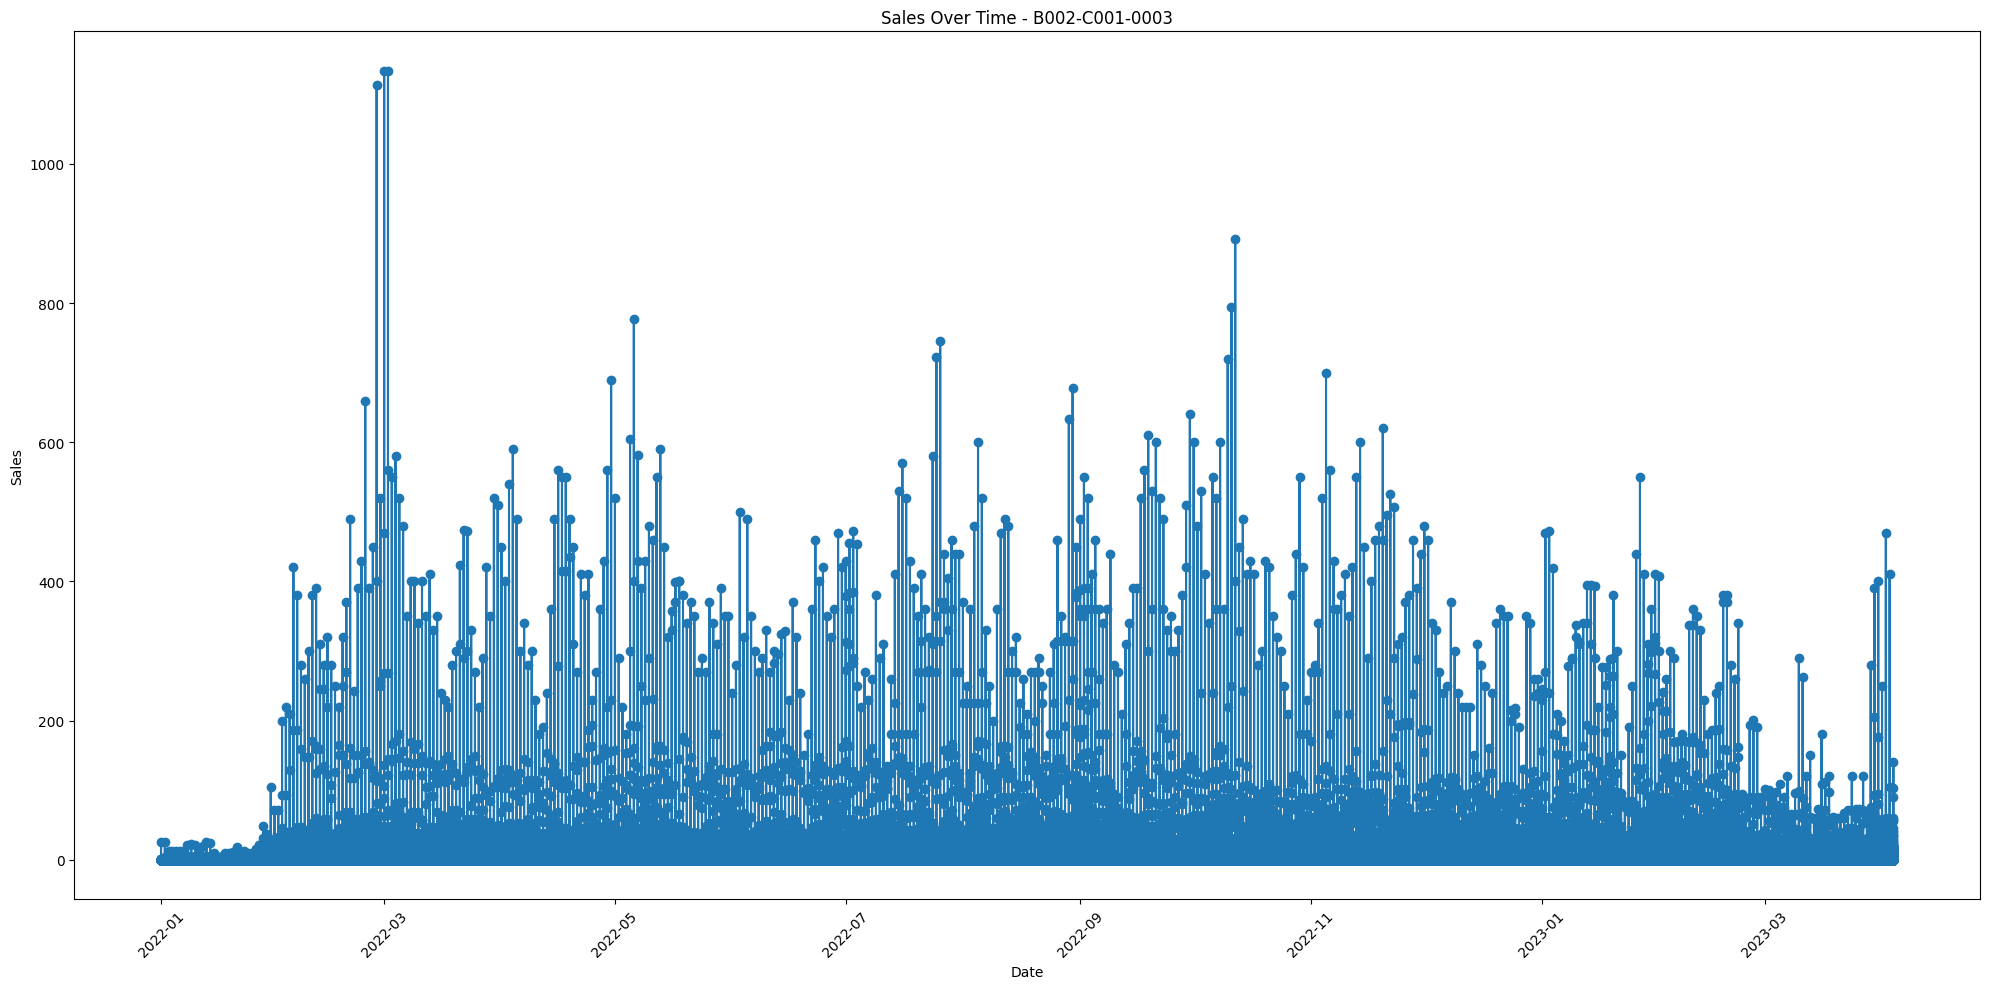

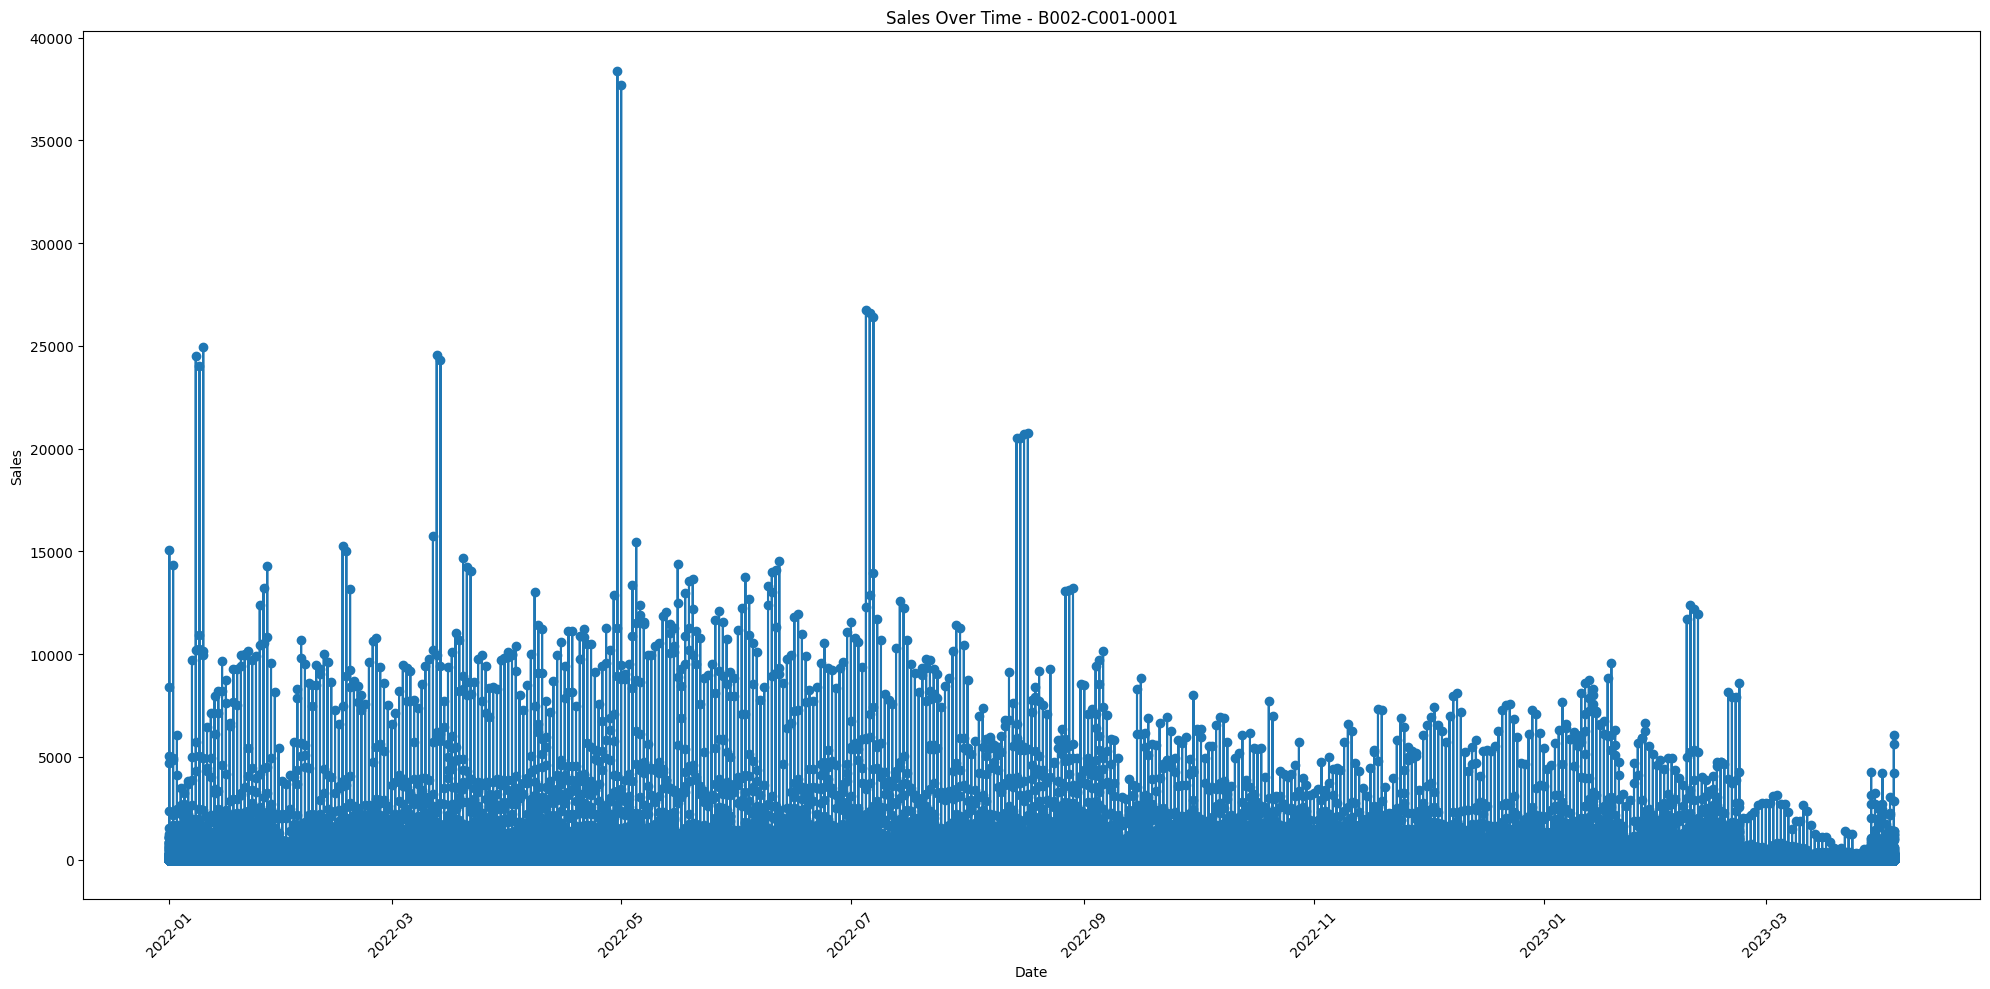

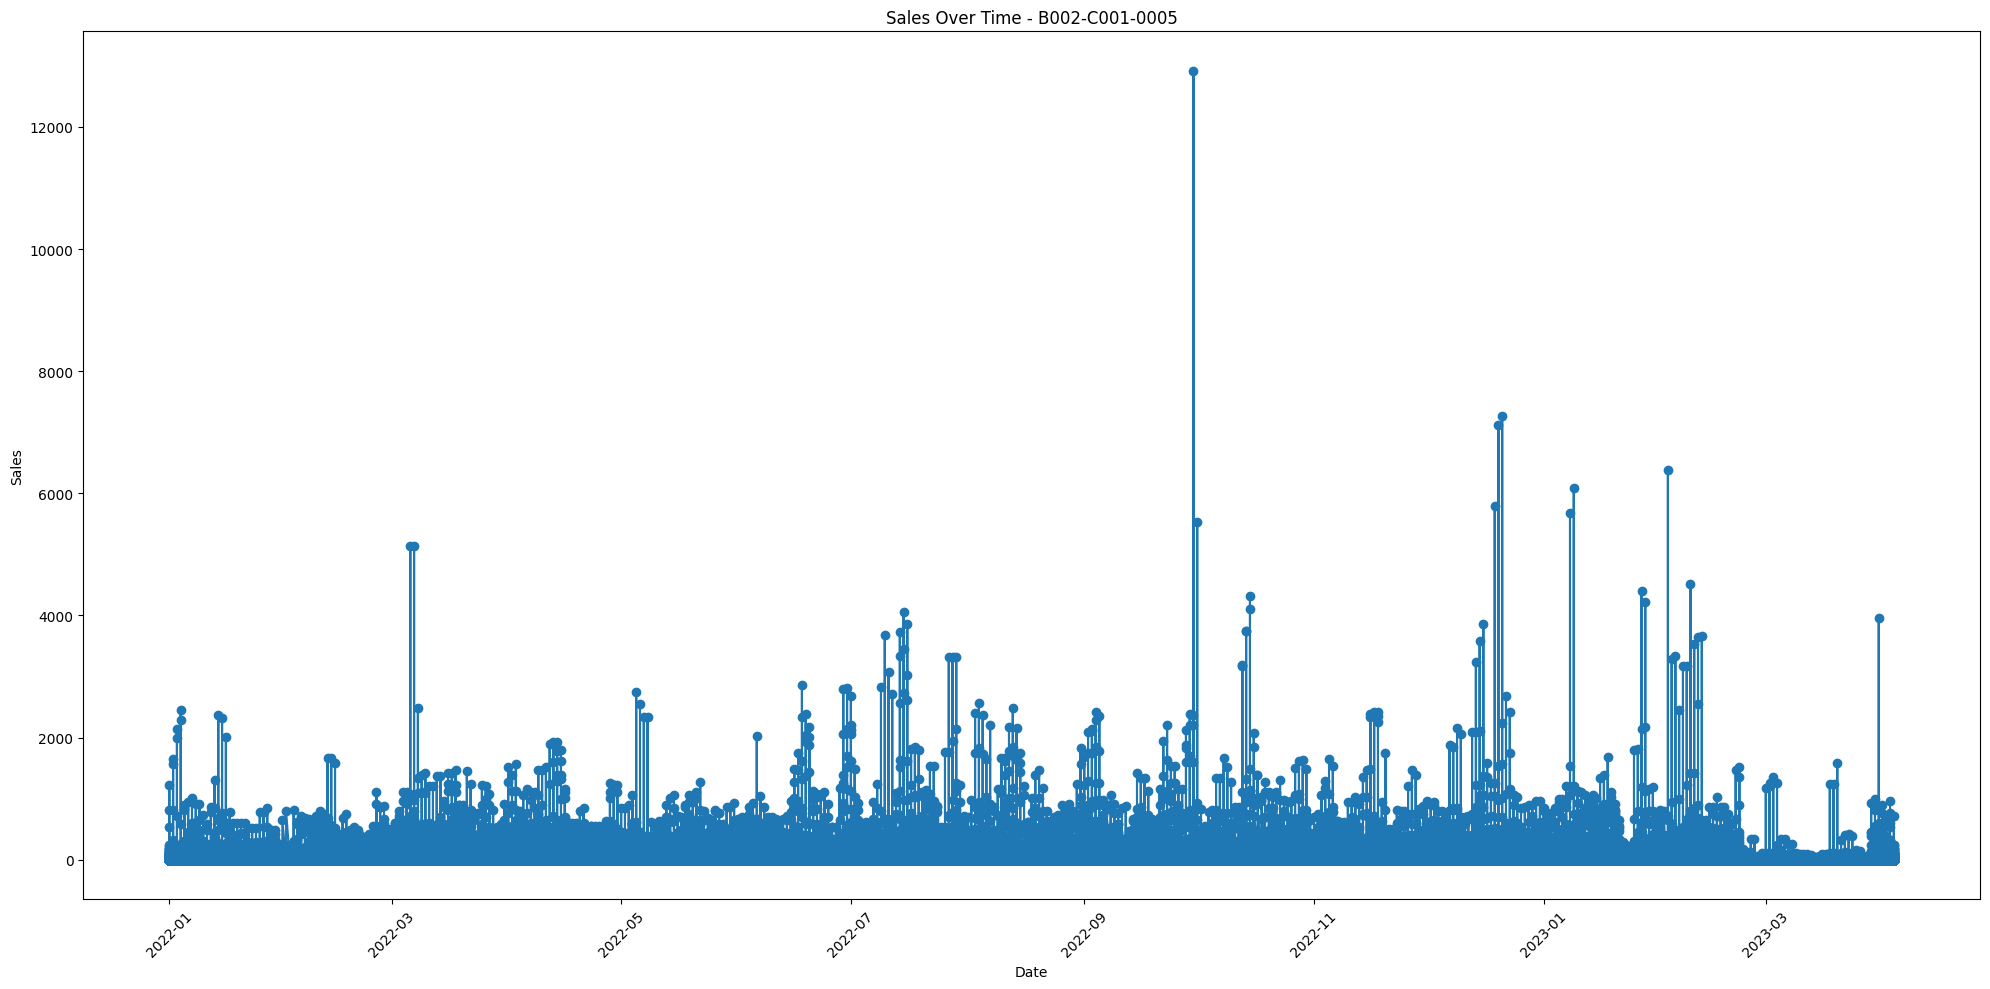

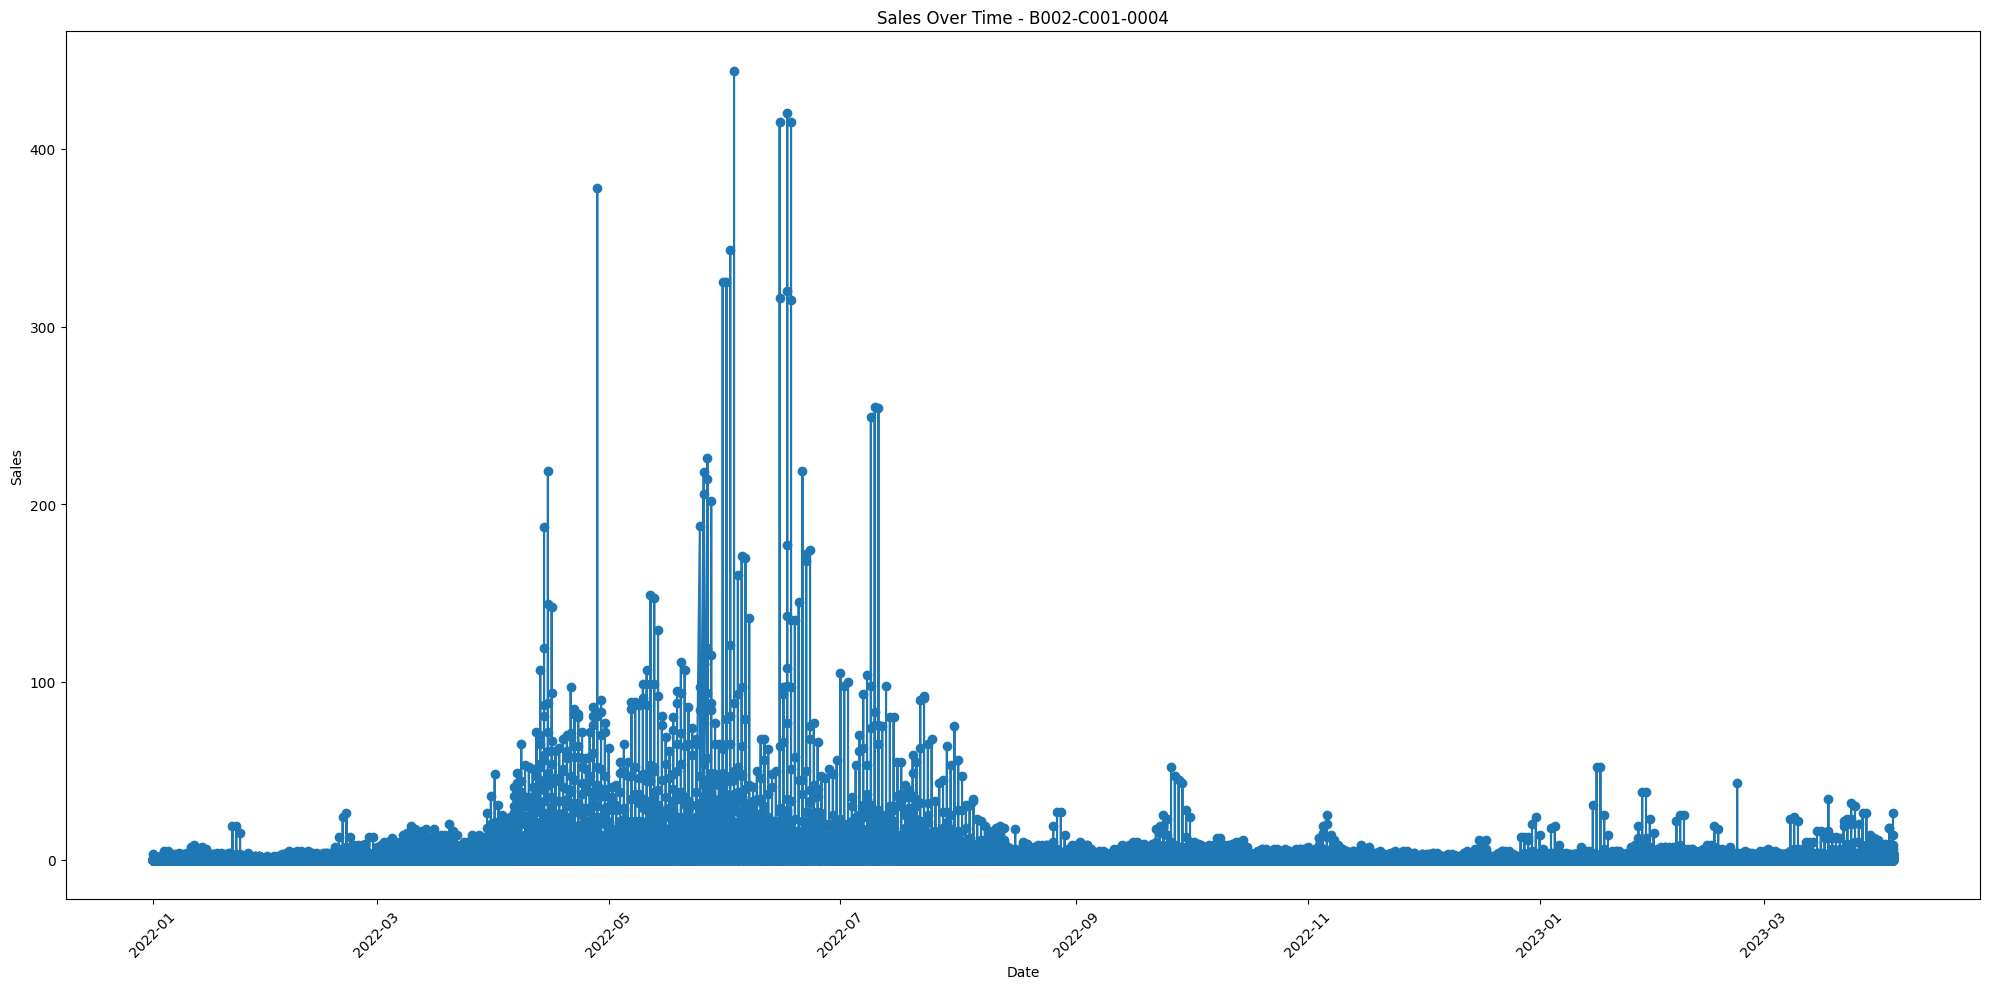

In [7]:
# 대분류별로 그래프 그리기
unique_categories = df_pivoted['대분류'].unique()

for category in unique_categories:
    category_df = df_pivoted[df_pivoted['대분류'] == category]
    plt.figure(figsize=(20, 10))
    plt.plot(category_df.index, category_df['sales'], marker='o')
    plt.title(f'Sales Over Time - {category}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Using dataprep

In [ ]:
!pip install dataprep

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('/content/drive/MyDrive/Aimers_온라인 채널 제품 판매량 예측/data/train.csv')

In [6]:
sub_train = train_data.iloc[:5000]

In [7]:
import pandas as pd
from dataprep.eda import create_report

# 시계열 그래프 생성
report = create_report(sub_train, title="Sales sub_train Report")
report.show_browser()


Computing size-chunk-b052dfec3dea7cbe4be9c1270a6693af-c7902d80778e450a002d2e0de9b442a0:   1%|          | 3319/502383 [00:18<04:41, 1770.32it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
Computing finalize-d96bb7ab-7d69-4c57-8651-d25a279237da:   1%|          | 4384/502383 [00:19<06:04, 1365.35it/s]               /usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1633: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = skew(a, axis)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1738: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  b2 = kurtosis(a, axis, fisher=False)
Computing series-sum